# Inaugural Project

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject as model
hsm = model.HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

To solve this model, we started by defining the given values for both alpha and sigma. After that, we created two arrays that can store the values for HF and HM.

Next, we created a for loop that would loop through the alpha values and, for each alpha value, run through all the sigma values. This allowed us to obtain all the different combinations of alpha and sigma values.

Within the for loop, we used the solve_discrete model which was given, and from this, we calculated the values for HF and HM and stored them in the empty arrays.

Finally, we plotted HF/HM against the sigma values.

/Users/christopher/projects-2023-2x-chris-og-ras/projects-2023-2x-chris-og-ras/inauguralproject/inauguralproject.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/christopher/projects-2023-2x-chris-og-ras/projects-2023-2x-chris-og-ras/inauguralproject/inauguralproject.py:62: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/christopher/projects-2023-2x-chris-og-ras/projects-2023-2x-chris-og-ras/inauguralproject/inauguralproject.py:66: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


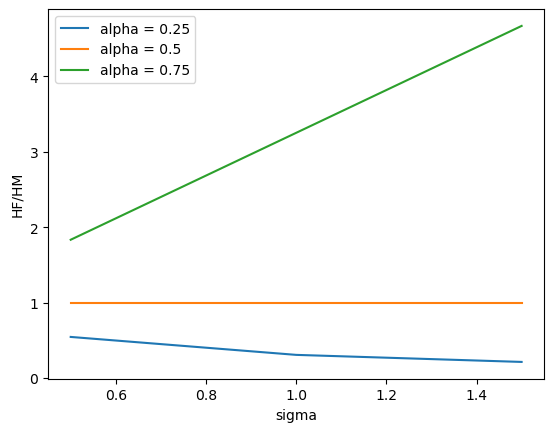

In [63]:
# define values of alpha and sigma to test
alpha_vals = np.array([0.25, 0.5, 0.75])
sigma_vals = np.array([0.5, 1.0, 1.5])

# create arrays to store HF/HM values
HF_vals = np.zeros((len(alpha_vals), len(sigma_vals)))
HM_vals = np.zeros((len(alpha_vals), len(sigma_vals)))

# loop over alpha and sigma values and solve model for each combination
for i, alpha in enumerate(alpha_vals):
    for j, sigma in enumerate(sigma_vals):
        hsm.par.alpha = alpha
        hsm.par.sigma = sigma
        opt = hsm.solve_discrete()
        HF_vals[i, j] = opt.HF
        HM_vals[i, j] = opt.HM

# plot HF/HM for each alpha/sigma combination
for i, alpha in enumerate(alpha_vals):
    plt.plot(sigma_vals, HF_vals[i]/HM_vals[i], label=f"alpha = {alpha}")
plt.legend()
plt.xlabel("sigma")
plt.ylabel("HF/HM")
plt.show()


# Question 2

Explain your code and procedure

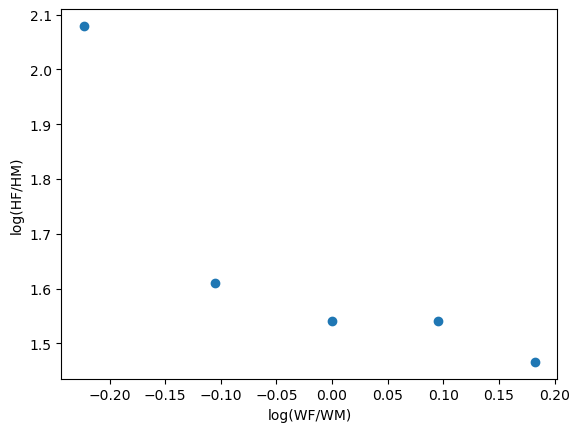

In [90]:
hsm.solve_wF_vec(discrete=True)

# Get the log of the female wage ratios and the corresponding log home production ratios
log_wf_ratio = np.log(hsm.par.wF_vec / hsm.par.wM)
log_home_ratio = np.log(hsm.sol.HF_vec / hsm.sol.HM_vec)

# Create a scatter plot with log_wf_ratio on x-axis and log_home_ratio on y-axis
plt.scatter(log_wf_ratio, log_home_ratio)

# Set axis labels
plt.xlabel('log(WF/WM)')
plt.ylabel('log(HF/HM)')

# Show the plot
plt.show()

# Question 3

Explain your code and procedure

ADD CONCISE CONLUSION.

# Question 4

Explain your code and procedure

# Question 5

Explain your code and procedure

In [ ]:
# code

